In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Diabetes_dataset.csv')

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df = df.drop_duplicates()
df.shape

(229781, 22)

In [ ]:
df=df.dropna()
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

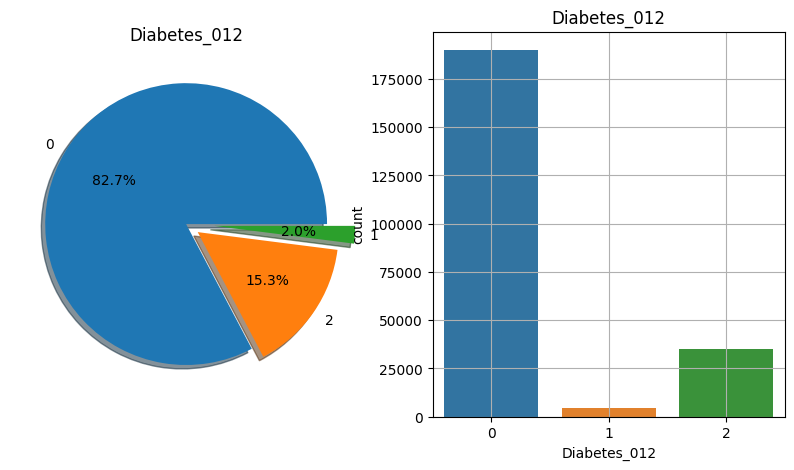

In [ ]:
f, ax = plt.subplots(1,2,figsize = (10,5))
df['Diabetes_012'].value_counts().plot.pie(explode = [0,0.1,0.2], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Diabetes_012')
ax[0].set_ylabel('')
sns.countplot( x = df['Diabetes_012'], ax = ax[1])
ax[1].set_title('Diabetes_012')
N, P ,S= df['Diabetes_012'].value_counts()
plt.grid()
plt.show()

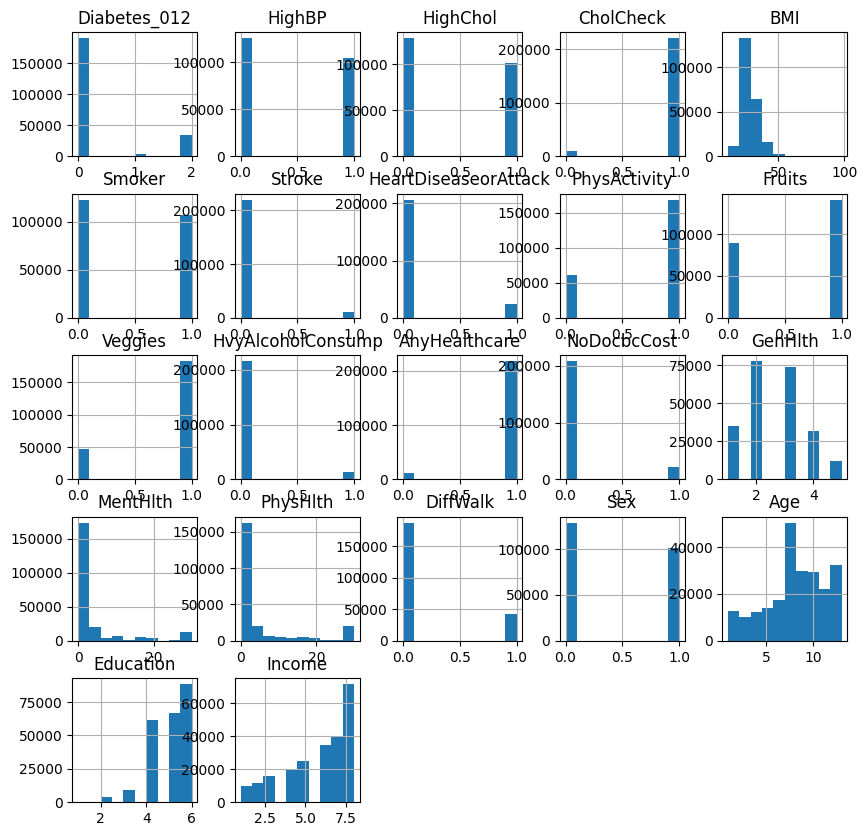

In [ ]:
df.hist(bins = 10, figsize = (10,10))
plt.show()

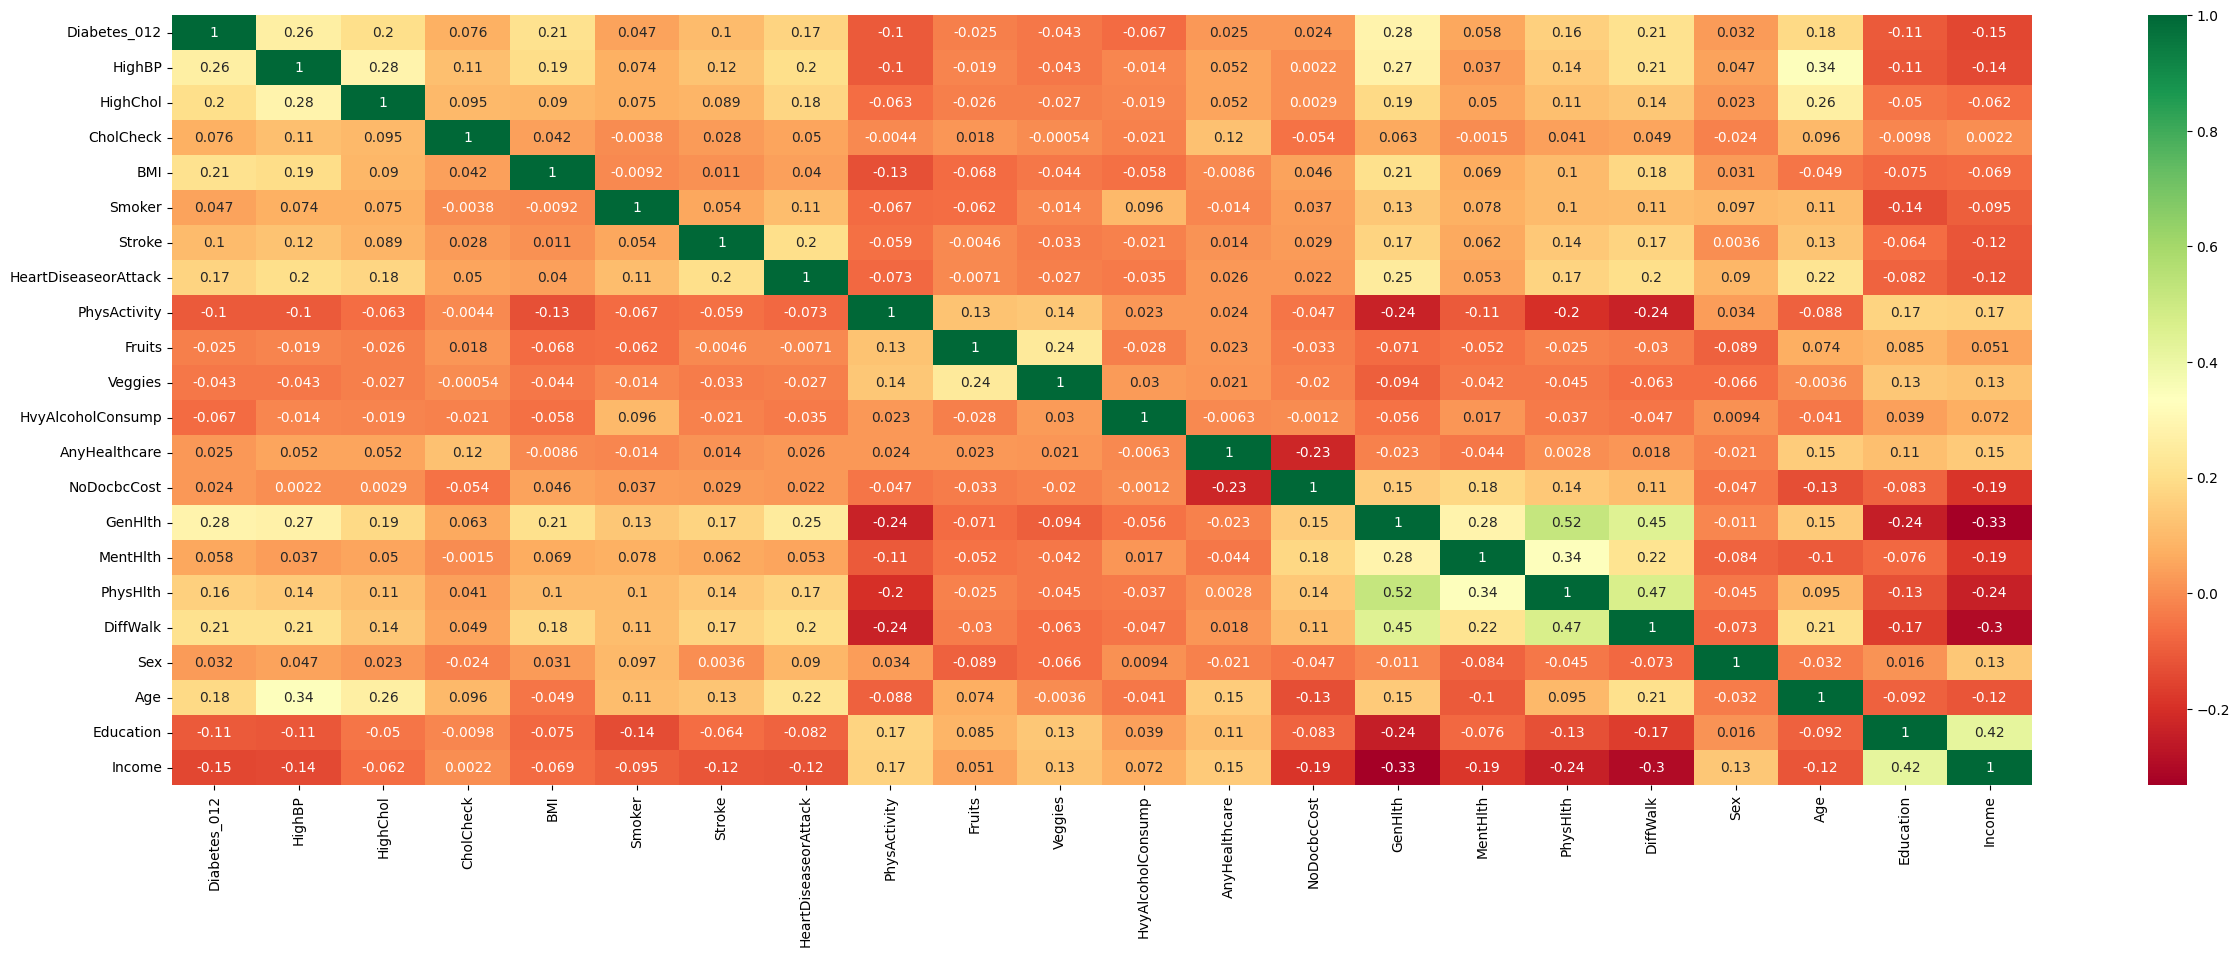

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [ ]:
Y = df['Diabetes_012']
X = df.drop(columns = 'Diabetes_012', axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, Y, test_size = 0.20, stratify=Y, random_state=7)

Accuracy: 0.8304937223926714


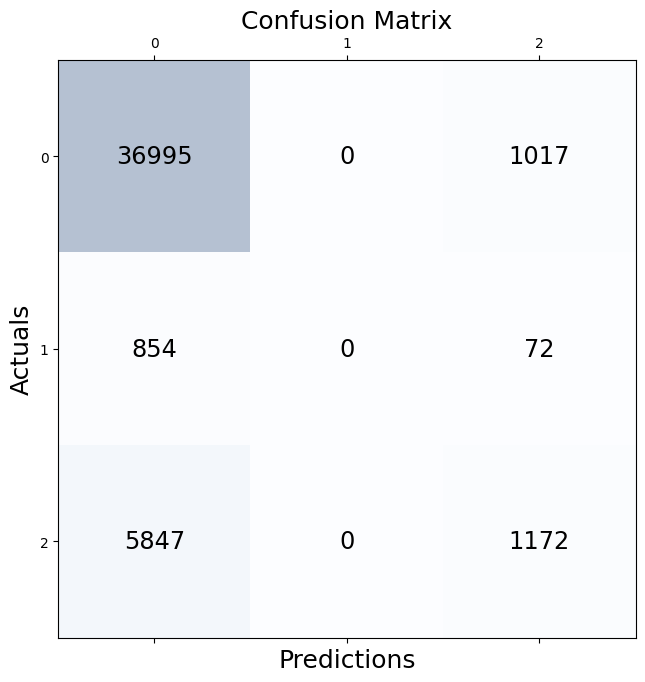

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test, lr_pred))
cm=np.array(confusion_matrix(y_test,lr_pred))
cm
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.8138259677524643


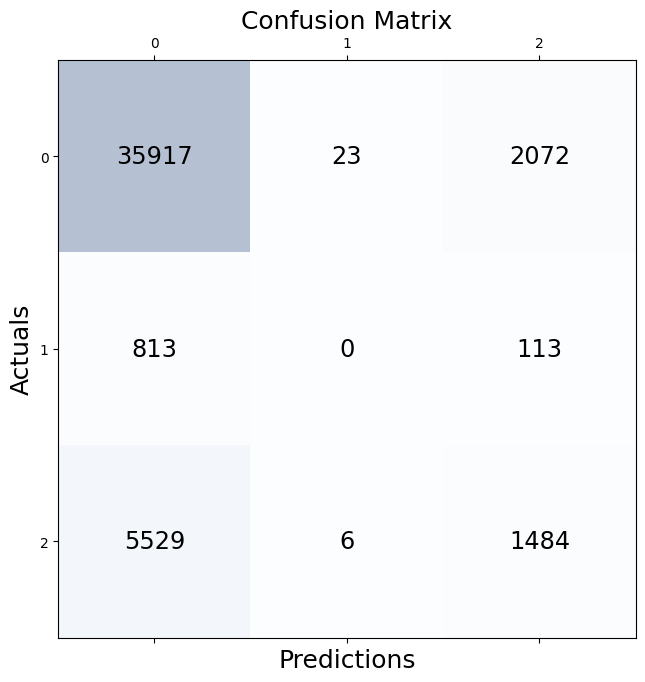

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test, knn_pred))
cm=np.array(confusion_matrix(y_test,knn_pred))
cm
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb .fit(x_train, y_train)
nb_pred = nb.predict(x_test)
print("Accuracy:",accuracy_score(y_test, nb_pred))

Accuracy: 0.7392997802293448


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, rf_pred))

Accuracy: 0.823008464434145
